In [1]:
import os
import numpy as np 

In [2]:
# -- plotting -- 
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False

In [3]:
passes = [1, 2, 3, 4]

# fiber assign efficiency from pre-SV3
#fa_eff_bright = np.array([0.444886, 0.584553, 0.714434, 0.810869])
#fa_eff_faint = np.array([0.158043, 0.271934, 0.415579, 0.550775]) 

In [4]:
# fiberassign efficiency from Anand's fiberassign runs over full footprint run on Oct 12, 2021
# fa_eff_bright_main = np.array([0.3, 0.53, 0.7, 0.81])
# fa_eff_faint_main = np.array([0.15, 0.32, 0.48, 0.63])

# numbers updated Mar 2, 2022 (https://desi.lbl.gov/trac/wiki/keyprojects/y1kp1#Fractionobservedaftereachpass:BRIGHTprogram)
# but they barely changed
fa_eff_bright_main = np.array([0.29, 0.52, 0.69, 0.81])
fa_eff_faint_main = np.array([0.15,0.32, 0.48, 0.62]) 
fa_eff_faint_hip_main = np.array([0.31, 0.55, 0.72, 0.83])
fa_eff_faint_lip_main = np.array([0.11, 0.26, 0.42, 0.57])

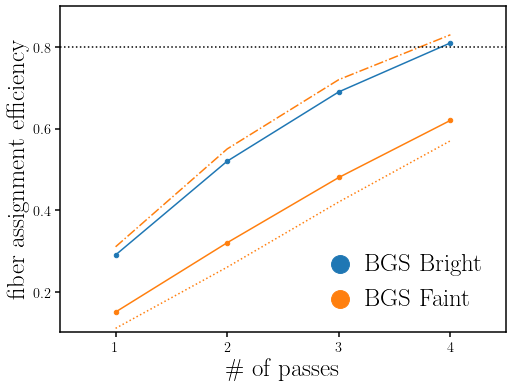

In [5]:
fig = plt.figure(figsize=(8,6))
sub = fig.add_subplot(111)
sub.scatter(passes, fa_eff_bright_main, c='C0', ls='-', s=20, label='BGS Bright', zorder=10)
sub.plot(passes, fa_eff_bright_main, c='C0', ls='-')

#sub.scatter(passes, fa_eff_bright, c='C0', ls='--', s=20)
#sub.plot(passes, fa_eff_bright, c='C0', ls='--')

sub.scatter(passes, fa_eff_faint_main, c='C1', ls='-', s=20, label='BGS Faint', zorder=10)
sub.plot(passes, fa_eff_faint_main, c='C1', ls='-')
sub.plot(passes, fa_eff_faint_hip_main, c='C1', ls='-.')
sub.plot(passes, fa_eff_faint_lip_main, c='C1', ls=':')


# sub.scatter(passes, fa_eff_faint, c='C1', ls='--', s=20)
# sub.plot(passes, fa_eff_faint, c='C1', ls='--')
# sub.plot([], [], c='k', ls='--', label='SV focal plane') 
sub.axhline(0.8, color='k', ls=':')

# handles,labels = plt.gca().get_legend_handles_labels()
# plt.legend([handles[1], handles[2], handles[0]], [labels[1], labels[2], labels[0]], loc='lower right', handletextpad=0.2, markerscale=2, fontsize=20)
plt.legend(loc='lower right', handletextpad=0, markerscale=4, fontsize=25)

sub.set_xlim(0.5, 4.5)
sub.set_xticks([1., 2., 3., 4.])
sub.set_xlabel(r'\# of passes', fontsize=25)
sub.set_ylim(0.1, 0.9)
sub.set_yticks([0.2, 0.4, 0.6, 0.8])
sub.set_ylabel('fiber assignment efficiency', fontsize=25)
fig.savefig('figs/fibassign_eff.pdf', bbox_inches='tight')

In [7]:
np.savetxt('dat/fig17_fiberassign_eff.dat', 
           np.vstack([np.arange(1,5), fa_eff_bright_main, fa_eff_faint_main, fa_eff_faint_hip_main, fa_eff_faint_lip_main]).T, 
           fmt='%i %f %f %f %f', header='BGS fiber assignment efficiency\n n_pass, BGS Bright, BGS Faint all, BGS Faint higher priority, BGS Faint lower priority')